In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv
/kaggle/input/seattle/calendar.csv


In [3]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [4]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
print("Shape: ",calendar.shape)
print("Types: \n",calendar.dtypes)
(calendar.isnull().sum()/calendar.shape[0]).sort_values(ascending=False)

Shape:  (1393570, 4)
Types: 
 listing_id     int64
date          object
available     object
price         object
dtype: object


price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

In [6]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [8]:
print("Shape: ",listings.shape)
(listings.isnull().sum()/listings.shape[0]).sort_values(ascending = False)

Shape:  (3818, 92)


license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [9]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
print("Shape: ",reviews.shape)
print("Types: \n",reviews.dtypes)
(reviews.isnull().sum()/reviews.shape[0]).sort_values(ascending=False)

Shape:  (84849, 6)
Types: 
 listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

In [11]:
calendar = calendar[~calendar['price'].isnull()]
calendar.shape

(934542, 4)

In [12]:
calendar['available'].unique()

array(['t'], dtype=object)

In [13]:
calendar.drop(['available'],inplace = True, axis = 1)

In [14]:
calendar[calendar['price'].apply(lambda x: '$' in x)].shape

(934542, 3)

In [15]:
calendar['price'] = calendar['price'].apply(lambda x: int(float(re.sub('[$,]','',x))))

In [16]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [17]:
calendar.head()

,listing_id,date,price
0,241032,2016-01-04,85
1,241032,2016-01-05,85
9,241032,2016-01-13,85
10,241032,2016-01-14,85
14,241032,2016-01-18,85


In [18]:
listings.shape

(3818, 92)

In [19]:
listings.drop(['license','square_feet'],axis=1,inplace=True)

In [20]:
listings.drop(['requires_license'],inplace = True, axis = 1)
listings.drop(['experiences_offered'],inplace = True, axis = 1)
listings.drop(['host_total_listings_count'],inplace = True, axis = 1)

In [21]:
print(listings[listings['price'].apply(lambda x: '$' in x)].shape)
listings['price'] = listings['price'].apply(lambda x: int(float(re.sub('[$,]','',x))))

(3818, 87)


In [22]:
listings['extra_people'] = listings['extra_people'].apply(lambda x: int(float(re.sub('[$,]','',x))))
listings['cleaning_fee'] = listings['cleaning_fee'].apply(lambda x: int(float(re.sub('[$,]','',x))) if isinstance(x, str) else x )

In [23]:
listings.corr()['cleaning_fee'].sort_values(ascending=False)

cleaning_fee                      1.000000
accommodates                      0.657223
price                             0.656938
beds                              0.626595
bedrooms                          0.622305
bathrooms                         0.545006
guests_included                   0.332619
host_listings_count               0.194610
calculated_host_listings_count    0.114659
extra_people                      0.067146
availability_365                  0.061467
review_scores_cleanliness         0.047078
availability_30                   0.035443
minimum_nights                    0.024157
availability_60                   0.018683
latitude                          0.013200
availability_90                   0.008245
review_scores_location            0.002241
maximum_nights                   -0.003939
review_scores_rating             -0.004991
review_scores_accuracy           -0.033504
review_scores_communication      -0.055294
review_scores_checkin            -0.064087
review_scor

In [24]:
listings['cleaning_fee'] = listings.sort_values(['price','accommodates','beds'],ascending = False)['cleaning_fee'].fillna(method='ffill').fillna(method='bfill')
listings['cleaning_fee'] = listings['cleaning_fee'].astype(int);

In [25]:
# create new column to hold the final review score value which is between 0 and 10
listings['final_review_score'] = listings['review_scores_rating']*listings['review_scores_accuracy']/100

# fill its missing values with the mean of the column
listings['final_review_score'].fillna(listings['final_review_score'].mean(),inplace = True);

# convert the column to integers from 0 to 10
listings['final_review_score'] = listings['final_review_score'].round().astype(int)

In [26]:
# change host_is_superhost, host_identity_verified, instant_bookable,
# require_guest_profile_picture, and require_guest_phone_verification to boolean
listings['host_is_superhost'] = (listings['host_is_superhost']=='t')*1
listings['host_identity_verified'] = (listings['host_identity_verified']=='t')*1
listings['instant_bookable'] = (listings['instant_bookable']=='t')*1
listings['require_guest_profile_picture'] = (listings['require_guest_profile_picture']=='t')*1
listings['require_guest_phone_verification'] = (listings['require_guest_phone_verification']=='t')*1
listings['host_is_superhost'] = (listings['host_is_superhost']=='t')*1

# convert rooms to int but first impute the missing values depending on the accommodates column
# This can be seen using the same correlation function used in cleaning_fee
listings['beds'] = listings.sort_values(['accommodates'],ascending=False)['beds'].fillna(method = 'ffill').fillna(method='bfill').astype(int)
listings['bedrooms'] = listings.sort_values(['accommodates'],ascending=False)['bedrooms'].fillna(method = 'ffill').fillna(method='bfill').astype(int)
listings['bathrooms'] = listings.sort_values(['accommodates'],ascending=False)['bathrooms'].fillna(method = 'ffill').fillna(method='bfill').astype(int)

# impute review_scores_location
listings['review_scores_location'] = listings.sort_values(['review_scores_rating'],ascending=False)['review_scores_location'].fillna(method = 'ffill').fillna(method='bfill').astype(int)

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [27]:
listings[['host_response_time',
'neighbourhood_cleansed',
'property_type',
'room_type',
'bed_type',
'amenities',
'cancellation_policy']].isnull().sum()

host_response_time        523
neighbourhood_cleansed      0
property_type               1
room_type                   0
bed_type                    0
amenities                   0
cancellation_policy         0
dtype: int64

In [28]:
listings['amenities']= listings['amenities'].apply(lambda x: re.sub('[{}"\'()]','',x))
amen_dummies_df = listings['amenities'].str.get_dummies(sep = ',')

In [31]:
amen_dummies_df['Internet'] = (amen_dummies_df['Internet'] | amen_dummies_df['Wireless Internet'])
amen_dummies_df.drop(['Wireless Internet'],axis = 1,inplace = True)

In [35]:
listings = pd.concat([listings, amen_dummies_df], axis=1, sort=False)

In [36]:
cat_dummies = pd.get_dummies(listings[['host_response_time', 'neighbourhood_cleansed', 'property_type', \
                             'room_type','bed_type','cancellation_policy']],prefix=\
                             ['response', 'in','prop','room','bed','cancel_pol'])

In [37]:
listings = pd.concat([listings, cat_dummies], axis=1, sort=False)

In [38]:
listings.rename(columns={"price":"original_price","id":"listing_id"},inplace=True)

In [39]:
df = pd.merge(calendar,listings,on='listing_id',how='left')

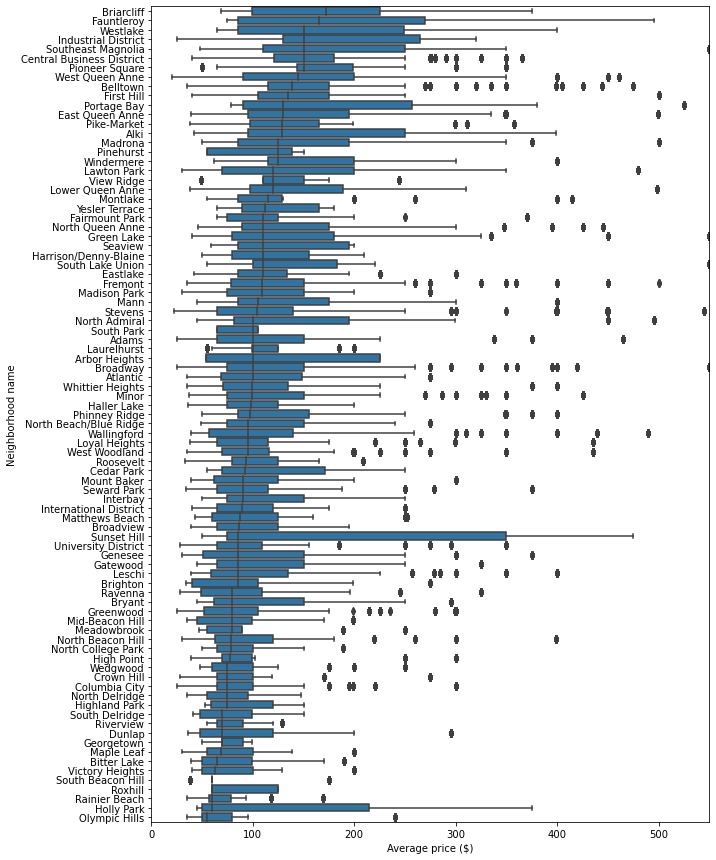

In [40]:
base_color = sb.color_palette()[0]
# Increase plot size
plt.figure(figsize = [10,15])
# order results descendingly by median of original_price
order = df.groupby(['neighbourhood_cleansed']).median().sort_values(['original_price'],ascending=False)['original_price'].index
# plot
sb.boxplot(data = df, y = 'neighbourhood_cleansed',x='original_price', color = base_color,order=order)
plt.xlabel('Average price ($)');
plt.ylabel('Neighborhood name');
# limit the x axis to remove ouliers for better visualization
plt.xlim([0,550]);

In [41]:
df['date'].max() - df['date'].min()

Timedelta('364 days 00:00:00')

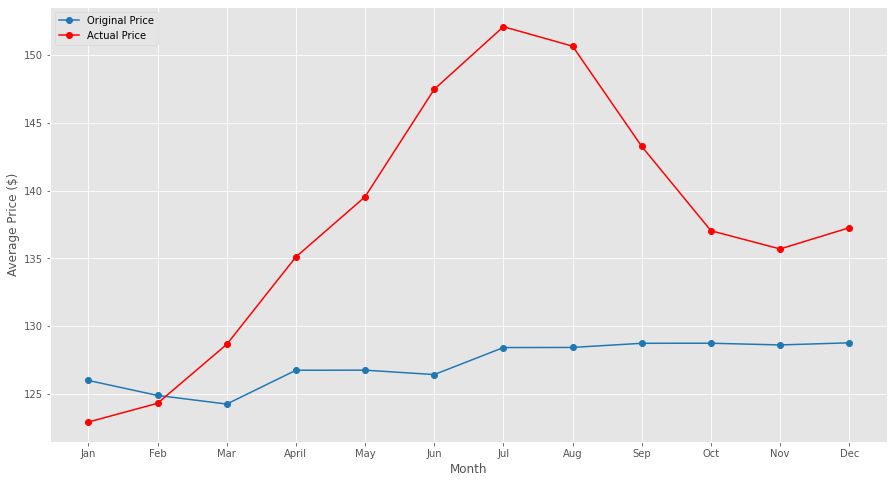

In [42]:
df['month'] = df['date'].dt.month
plt.figure(figsize = [15,8])
plt.style.use('ggplot')

# Plotting
y_org_values = df.groupby(['month'])['original_price'].mean()
y_act_values = df.groupby(['month'])['price'].mean()
x_values = ['Jan', 'Feb', 'Mar', 'April','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(x_values,y_org_values, '-o',color=base_color,label = 'Original Price')
plt.plot(x_values,y_act_values, 'r-o',label = 'Actual Price')

plt.legend(loc="upper left")
plt.xlabel('Month')
plt.ylabel('Average Price ($)');

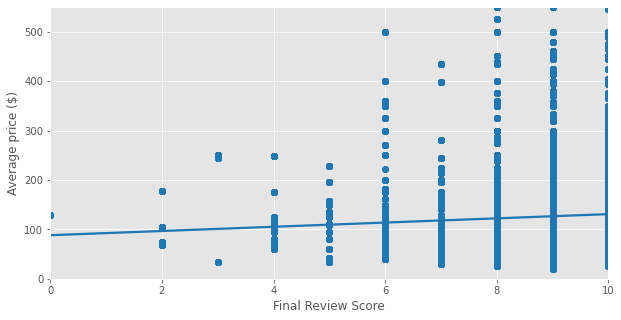

In [43]:
plt.figure(figsize = [10,5])

sb.regplot(data = df, x= 'final_review_score',y='original_price',color=base_color)
plt.ylim(0, 550);
plt.ylabel('Average price ($)');
plt.xlabel('Final Review Score');

Text(0, 0.5, 'Listings')

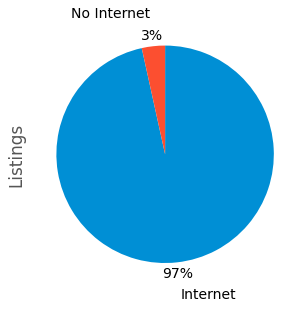

In [44]:
plt.figure(figsize = [5,5])
sorted_counts = df['Internet'].value_counts()
plt.style.use('fivethirtyeight')
plt.pie(sorted_counts,startangle = 90, counterclock = False, labels = ['Internet','No Internet'], autopct='%1.0f%%',\
       pctdistance=1.1,labeldistance=1.3);
plt.ylabel('Listings')

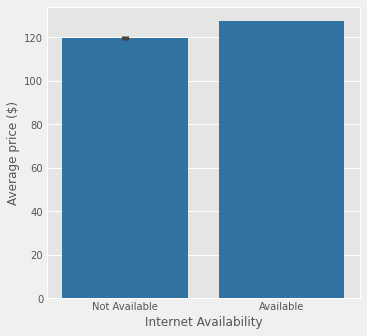

In [45]:
plt.figure(figsize = [5,5])
plt.style.use('ggplot')

sb.barplot(data = df, y = 'original_price',x='Internet', color = base_color)
plt.ylabel('Average price ($)');
plt.xlabel('Internet Availability');

plt.xticks(ticks = [0,1], labels = ['Not Available','Available']);

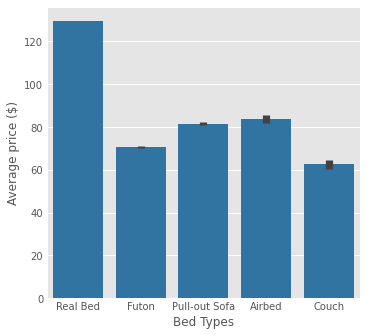

In [56]:
plt.figure(figsize = [5,5])
plt.style.use('ggplot')

sb.barplot(data = df, y = 'original_price',x='bed_type', color = base_color)
plt.ylabel('Average price ($)');
plt.xlabel('Bed Types');

plt.xticks(ticks = [0,1,2,3,4], labels = ['Real Bed' ,'Futon', 'Pull-out Sofa', 'Airbed' ,'Couch']);

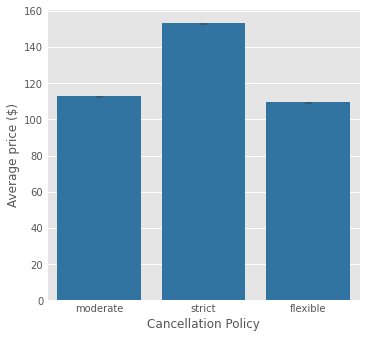

In [49]:
plt.figure(figsize = [5,5])
plt.style.use('ggplot')

sb.barplot(data = df, y = 'original_price',x='cancellation_policy', color = base_color)
plt.ylabel('Average price ($)');
plt.xlabel('Cancellation Policy');

plt.xticks(ticks = [0,1,2], labels = df['cancellation_policy'].unique());

In [50]:
df.corr()['original_price'].sort_values(ascending=False)

original_price                      1.000000e+00
price                               9.113126e-01
cleaning_fee                        6.682592e-01
accommodates                        6.474874e-01
bedrooms                            6.288623e-01
beds                                5.819537e-01
bathrooms                           4.985616e-01
room_Entire home/apt                4.446464e-01
guests_included                     4.106010e-01
Family/Kid Friendly                 2.567117e-01
TV                                  2.364737e-01
cancel_pol_strict                   2.259567e-01
Air Conditioning                    1.439009e-01
Indoor Fireplace                    1.410995e-01
Hot Tub                             1.341342e-01
extra_people                        1.293186e-01
Doorman                             1.276851e-01
Gym                                 1.274978e-01
Washer / Dryer                      1.252408e-01
Kitchen                             1.224925e-01
bed_Real Bed        

In [51]:
df[['price',
'accommodates',
'bedrooms',
'beds',
'cleaning_fee',
'guests_included',
'review_scores_location',
'latitude',
'bathrooms',
'host_listings_count',
'longitude',
'final_review_score',
'minimum_nights',
'extra_people',
'availability_30',
'month']].isnull().sum()

price                      0
accommodates               0
bedrooms                   0
beds                       0
cleaning_fee               0
guests_included            0
review_scores_location     0
latitude                   0
bathrooms                  0
host_listings_count       92
longitude                  0
final_review_score         0
minimum_nights             0
extra_people               0
availability_30            0
month                      0
dtype: int64

In [57]:
df.corr()['host_listings_count'].sort_values(ascending=False)

host_listings_count                 1.000000e+00
Gym                                 2.828173e-01
Pool                                2.798067e-01
24-Hour Check-in                    2.487918e-01
cancel_pol_strict                   2.459721e-01
in_Belltown                         2.438324e-01
calculated_host_listings_count      2.215589e-01
in_Central Business District        2.152997e-01
Hair Dryer                          2.152714e-01
Hot Tub                             2.123258e-01
Elevator in Building                2.058096e-01
cleaning_fee                        1.995791e-01
Iron                                1.949713e-01
price                               1.793924e-01
Hangers                             1.601235e-01
prop_Apartment                      1.389146e-01
accommodates                        1.355075e-01
Family/Kid Friendly                 1.239487e-01
beds                                1.098961e-01
Air Conditioning                    1.047190e-01
availability_60     

In [58]:
df.dropna(subset=['host_listings_count'],inplace = True)

In [59]:
df[['price',
'accommodates',
'bedrooms',
'beds',
'cleaning_fee',
'guests_included',
'review_scores_location',
'latitude',
'bathrooms',
'host_listings_count',
'longitude',
'final_review_score',
'minimum_nights',
'extra_people',
'availability_30',
'month']].isnull().sum()

price                     0
accommodates              0
bedrooms                  0
beds                      0
cleaning_fee              0
guests_included           0
review_scores_location    0
latitude                  0
bathrooms                 0
host_listings_count       0
longitude                 0
final_review_score        0
minimum_nights            0
extra_people              0
availability_30           0
month                     0
dtype: int64

In [60]:
X = df.select_dtypes(np.number).drop(['listing_id','scrape_id','host_id','reviews_per_month',\
                                      'review_scores_rating','review_scores_communication','review_scores_checkin',\
                                     'review_scores_cleanliness','review_scores_value','review_scores_accuracy',
                                     'host_is_superhost','host_identity_verified','original_price','maximum_nights',\
                                     'availability_60','availability_90','availability_365','number_of_reviews',\
                                     'instant_bookable','require_guest_profile_picture','require_guest_phone_verification',\
                                     'calculated_host_listings_count'],axis = 1)
y = df['original_price']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 50)
# instantiate
lm_model = LinearRegression(normalize = True)
# fit
lm_model.fit(X_train, y_train) #training the algorithm
# predict
y_test_pred = lm_model.predict(X_test)
# score
"The r-squared error for the model was {}".format(r2_score(y_test,y_test_pred))

'The r-squared error for the model was 0.8631829987577693'